In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [15]:
data=pd.read_csv('LoanApprovalPrediction.csv')

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-1.599278,0.314162,1.0,Urban,Y
1,1,1,1,0,0,-0.134412,-0.038732,-0.149160,0.314162,1.0,Rural,N
2,1,1,0,0,1,-0.393747,-0.554487,-0.851561,0.314162,1.0,Urban,Y
3,1,1,0,1,0,-0.462062,0.251980,-0.239792,0.314162,1.0,Urban,Y
4,1,0,0,0,0,0.097728,-0.554487,-0.001882,0.314162,1.0,Urban,Y


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [20]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [19]:
data=data.fillna({'Gender':"nan", 'Married':"nan",'Dependents':"nan",'Education':"nan",'Self_Employed':"nan"}).fillna(0)

In [31]:
data.Gender.unique()

array([1, 0, 2])

In [27]:
data[['Married']]

,Married
0,No
1,Yes
2,Yes
3,Yes
4,No
...,...
609,No
610,Yes
611,Yes
612,Yes


In [34]:
encoder=LabelEncoder()
data['Married']=encoder.fit_transform(data['Married'])
data['Gender']=encoder.fit_transform(data['Gender'])
data['Dependents']=encoder.fit_transform(data['Dependents'])
data['Education']=encoder.fit_transform(data['Education'])
data['Self_Employed']=encoder.fit_transform(data['Self_Employed'])
data['Property_Area']=encoder.fit_transform(data['Property_Area'])
data['Loan_Status']=encoder.fit_transform(data['Loan_Status'])

In [32]:
scalar=StandardScaler()
data[['ApplicantIncome']]=scalar.fit_transform(data[['ApplicantIncome']])
data[['CoapplicantIncome']]=scalar.fit_transform(data[['CoapplicantIncome']])
data[['LoanAmount']]=scalar.fit_transform(data[['LoanAmount']])
data[['Loan_Amount_Term']]=scalar.fit_transform(data[['Loan_Amount_Term']])

In [36]:
x=data.drop(['Loan_Status'],axis=1)
y=data[['Loan_Status']]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.4)

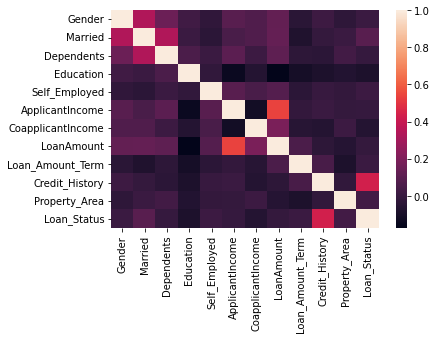

In [43]:
sns.heatmap(data.corr())

In [37]:
randfore=RandomForestClassifier()
randfore.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [38]:
y_pred=randfore.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        81
           1       0.76      0.87      0.81       165

    accuracy                           0.73       246
   macro avg       0.69      0.65      0.66       246
weighted avg       0.71      0.73      0.71       246



In [41]:
print(accuracy_score(y_test,y_pred))

0.7276422764227642
